<a href="https://colab.research.google.com/github/comparativechrono/Rephasing-of-Seasonal-Birth-Rates-in-the-United-Kingdom-/blob/main/Additional_analysis/seasonal_decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Seasonal Decomposition of birth rate

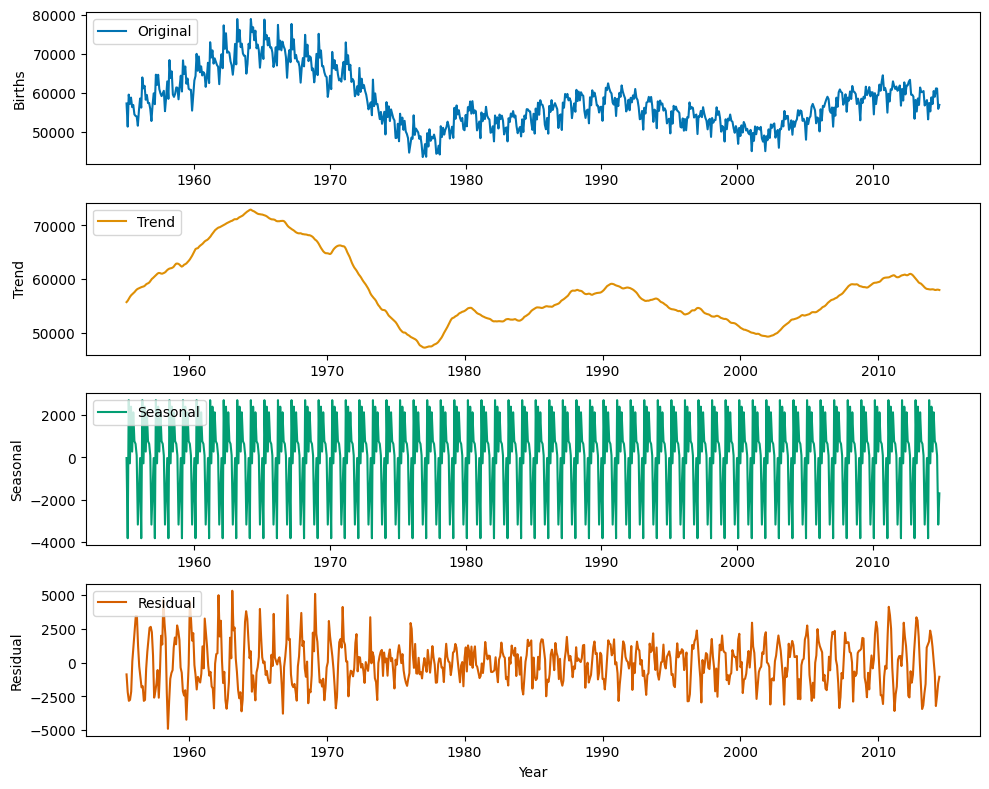

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

# Import data from the CSV file named 'data.csv'
data = pd.read_csv('data.csv', names=['Year', 'Month', 'Births', 'PeakConceptionMonth'])

# Capitalize the first letter of each month name
data['Month'] = data['Month'].str.capitalize()

# Combine 'Year' and 'Month' to a 'Date' column
data['Date'] = pd.to_datetime(data['Year'].astype(str) + ' ' + data['Month'], format='%Y %B')

# Set 'Date' column as the index
data.set_index('Date', inplace=True)

# Apply seasonal decomposition
decomposition = seasonal_decompose(data['Births'], model='additive', period=12)

# Retrieve the trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Set color palette
palette = sns.color_palette('colorblind')

# Plot the original data, trend, seasonal, and residual components
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(data['Births'], label='Original', color=palette[0])
plt.legend(loc='upper left')
plt.ylabel('Births')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color=palette[1])
plt.legend(loc='upper left')
plt.ylabel('Trend')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal', color=palette[2])
plt.legend(loc='upper left')
plt.ylabel('Seasonal')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual', color=palette[3])
plt.legend(loc='upper left')
plt.ylabel('Residual')

plt.xlabel('Year')
plt.tight_layout()
plt.show()
